In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import requests
from zipfile import ZipFile
from io import BytesIO

In [77]:

# URL del archivo ZIP
url_zip = 'http://www.dgis.salud.gob.mx/descargas/datosabiertos/nacimientos/sinac_2023.zip?V=2024.05.14'

# Descarga del archivo ZIP
r = requests.get(url_zip)

# Lectura del contenido del archivo ZIP
zip_file = ZipFile(BytesIO(r.content))

# Lista de los archivos en el ZIP
archivos_zip = zip_file.namelist()

# Selección el archivo CSV en el ZIP
nombre_archivo_csv = [f for f in archivos_zip if f.endswith('.csv')][0]

# Abrir el archivo CSV desde el ZIP
with zip_file.open(nombre_archivo_csv) as archivo_csv:
    datos = pd.read_csv(archivo_csv)

# Tipos de datos
tipos_de_datos_mas_importantes = datos.dtypes.head()

print("Tipos de datos más importantes:")
print(tipos_de_datos_mas_importantes)


Tipos de datos más importantes:
NACIOEXTRANJERO        int64
ENTIDADNACIMIENTO      int64
MUNICIPIONACIMIENTO    int64
EDAD                   int64
SECONSIDERAINDIGENA    int64
dtype: object


In [63]:

# Encabezados del DataFrame
print("Encabezados del DataFrame:")
print(datos.columns)



Encabezados del DataFrame:
Index(['NACIOEXTRANJERO', 'ENTIDADNACIMIENTO', 'MUNICIPIONACIMIENTO', 'EDAD',
       'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE',
       'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS',
       'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES',
       'CONDICIONHIJOANTERIOR', 'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO',
       'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS',
       'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD', 'INTERRUMPIOESTUDIOS',
       'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE',
       'FECHANACIMIENTO', 'HORANACIMIENTO', 'SEXO', 'EDADGESTACIONAL', 'TALLA',
       'PESO', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO',
       'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 

In [68]:
#Encabezados del data frame
HEAD = datos.head(20)
print(HEAD)

    NACIOEXTRANJERO  ENTIDADNACIMIENTO  MUNICIPIONACIMIENTO  EDAD  \
0                 2                  9                   12    25   
1                 2                 15                   33    22   
2                 2                 12                   28    20   
3                 2                 13                   63    28   
4                 2                 15                  101    29   
5                 2                 11                   32    36   
6                 2                 20                  102    33   
7                 2                 20                   67    17   
8                 2                 11                   42    22   
9                 2                 14                   39    23   
10                2                 14                   67    28   
11                2                 20                  184    30   
12                2                 30                  189    34   
13                2               

In [61]:
# Seleccionar solo las filas donde la columna 'ENTIDADNACIMIENTO' sea igual a 'SONORA'
datos_sonora = datos[datos['ENTIDADNACIMIENTO'] == '26']


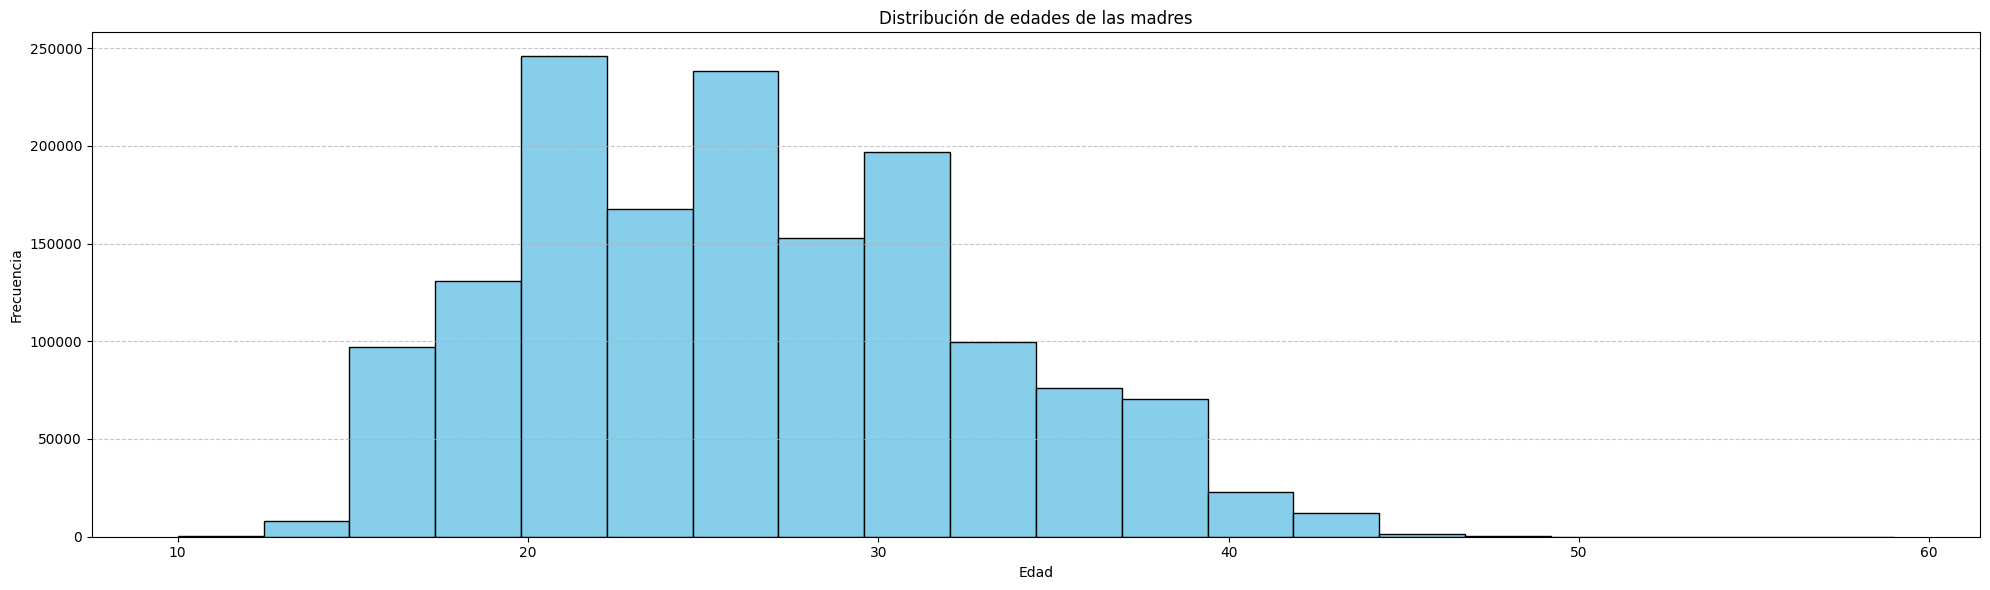

In [74]:
#Gráfica de barras de la edad de la madre

plt.figure(figsize=(20, 6))
datos['EDAD'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')  # Histograma de la columna de edades
plt.title('Distribución de edades de las madres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una rejilla horizontal para una mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

Se observa en la gráfica que una gran cantidad de nacimientos provienen de madres con edad de entre 20 y 23 años. A partir de los 35 años disminuyen los nacimientos de manera marcada.
